<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" rel="stylesheet">
<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1>Bike Sales EDA + Visualization</h1>
</div>
<p></p>
<p>Notebook plan & code aims:</p>
<ol>
    <li>First of all I want to make a <mark>brief EDA</mark> to figure out more about dataset. I would like to look at the data typrd, Nan data and take a look at some anomalies (if they exist)</li>
    <li>My next step will <mark>visualization</mark>. Mainly it will consist of scatter plots with regression - I am going to look at the <mark>dependencies</mark> which I am interested in. More details in visualization section</li>
    <li>Also, in visualization section you find a lot of <mark>basic bars</mark> - I will need them to choose the most objective and logiacal columns for building scatters</li>
    <li>Finally, I will the list of <mark>my conlusions</mark>, based on the graphs and charts in vis section. All the conclusions will be based on the information personally I am interested in (I think you will like it as well).</li>
</ol>

In [15]:
!pip install missingno

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')



In [2]:
bikes_df = pd.read_excel('/content/bike sales prediction data.csv.xlsx')
bikes_df.head()

,Sales_Number,Date,Day,Month,Year,Customer_Age,Age,Customer_Gender,Country,State,Product Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,2022-12-01,1.0,December,2022,39,Adults (35-64),F,India,Maharashtra,Bikes,Mountain Bike,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,2,2022-12-01,1.0,December,2022,44,Adults (35-64),M,India,Uttar Pradesh,Bikes,Mountain Bike,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,3,2022-12-02,2.0,December,2022,37,Adults (35-64),M,India,Maharashtra,Bikes,Mountain Bike,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,4,2022-12-02,2.0,December,2022,31,Young Adults (25-34),F,India,New Delhi,Bikes,Mountain Bike,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,5,2022-12-03,3.0,December,2022,37,Adults (35-64),F,India,Maharashtra,Bikes,Mountain Bike,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1>EDA and Data Cleaning</h1>
</div>
<p></p>
<p>First of all, I would like to take a look at the <mark>Nan values</mark>. This is my basic start and I usually start my EDA and notebook in general from matrix of Nan values. If you will read my other notebooks and datasets, you will find out that its easier to look at the Nan values as a chart. The whole picture of data in that case is more objective</p>
<p>As you will see below, there are <mark>not so many Nan</mark> values in this dataset, that is why there is no need to drop them (as I think), nevertheless, it was crucial step in EDA and data cleaning</p>

<Axes: >

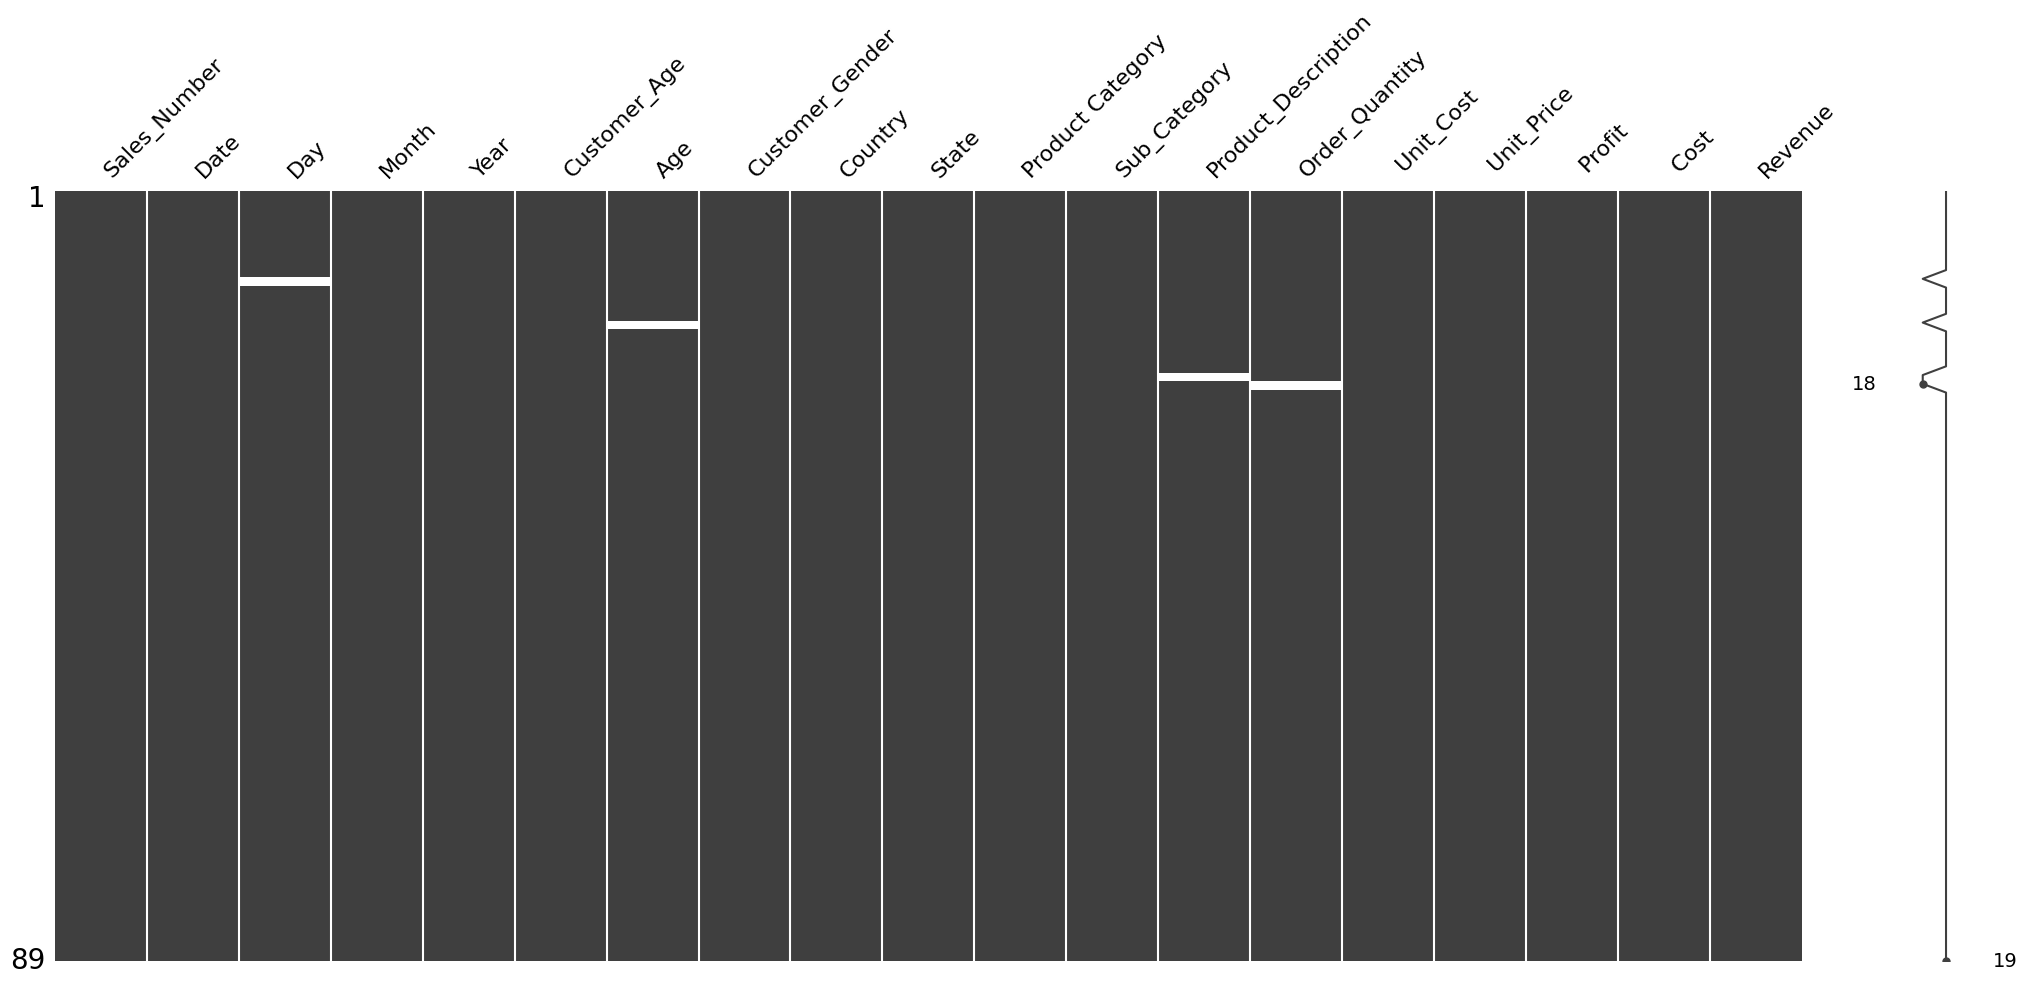

In [3]:
msno.matrix(bikes_df)

<p>Now, I want to look at the whole dataset in a brief and short format. I will do it with <mark>describe</mark> function. I will tell you the truth, I am not really big fan of describe function. I believe, that I will give even more information about my dataframe using bars and other plots, but it is some kind of classic, <mark>basic</mark> step, so I don't have a desire to ruin traditions</p>

In [4]:
bikes_df.describe()

,Sales_Number,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,89.000000,88.000000,89.0,89.000000,88.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,45.000000,13.534091,2022.0,34.202247,2.125000,1052.247191,1940.943820,1848.887640,2204.235955,4043.94382
std,25.836021,6.391353,0.0,8.090651,1.239322,440.499001,789.955743,1394.401162,1730.330926,3139.75858
min,1.000000,1.000000,2022.0,17.000000,1.000000,0.000000,0.000000,245.000000,0.000000,0.00000
25%,23.000000,8.750000,2022.0,30.000000,1.000000,420.000000,2295.000000,1043.000000,1252.000000,2295.00000
50%,45.000000,13.500000,2022.0,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.00000
75%,67.000000,19.000000,2022.0,38.000000,3.000000,1266.000000,2320.000000,2954.000000,3756.000000,6750.00000
max,89.000000,24.000000,2022.0,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.00000


<p>The next step for me and my EDA will be <mark>data types</mark> information. I believe that this is the most useful function in EDA, because not knowing the exact datatypes <mark>will ruin all the plots</mark> and charts process. Only after setting new, appropriate datatypes, start you visualization. This is also classic step - don't miss it!</p>
<p>In this dataset all the data types are ok - they won't ruin my plots, they don't ruin the whole picture of the data and don't ruin my further conclusion, so I will them as they are</p>

In [5]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Number         89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age                  88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

<p>I have noticed only one cell, that <mark>will ruin my conclusions</mark> just a little bit. There is a cell where the dataset author made a mistake in a month name and called 'December' - 'Decembr'. I noticed it by mistake. I won't ruin all the charts, but I decided to replace this values to make a dataset as clean as possible. So, below you will see the <mark>correct Month column</mark>. This is rather trivial operation, so, I don't think I should explain every word of my code<p>

In [6]:
bikes_df['Month'].value_counts()
bikes_df['Month'] = bikes_df['Month'].str.replace('Decmber','December')

<p>One more thing that I have noticed is that there are <mark>too many extra spaces</mark> in column names. For example, in Profit, Cost and Unit_Cost columns. I noticed it, when started to make up charts and graphs, not when I write this markdown. I think its rather hard to find it out at the first glance at a dataset, but, I returned to this later, So, not so bad</p>

In [7]:
columns_no_spaces = [column.strip() for column in bikes_df.columns]
bikes_df.columns = columns_no_spaces
bikes_df.columns

Index(['Sales_Number', 'Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age',
       'Customer_Gender', 'Country', 'State', 'Product Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue'],
      dtype='object')

<p>One more thing that I have noticed is that there are also <mark>extra (unneccesary spaces) in the dataset</mark> as well. So, I chose all the string data types columns and stripped them, removing all the extra spaces at the end and at the beginning of the cell value + I have noticed that in the Country column for United States, there were another extra space between two words, so I had to made extra interation to remove it. It will definitely ruin my plots in other case</p>

In [8]:
bikes_df = bikes_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
bikes_df['Country'] = bikes_df['Country'].replace('United  States','United States')
bikes_df['Country'].value_counts()

India    89
Name: Country, dtype: int64

<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1>EDA Visualization</h1>
</div>
<p></p>
<p>In visualization section, I would like to look at the <mark>basic plots first of all</mark>. My fist plot is dedicated to total profit by date. I am not sure that I have to explain you what does it illustrates, but actually it shows the total profit by date (obviously) in a line plot, which is the most convenient chart for this type of EDAs. The only thing I ask you here - please, set grid to True. Pease, respect the others readers and always <mark>set grid lines to True</mark> :pray:</p>

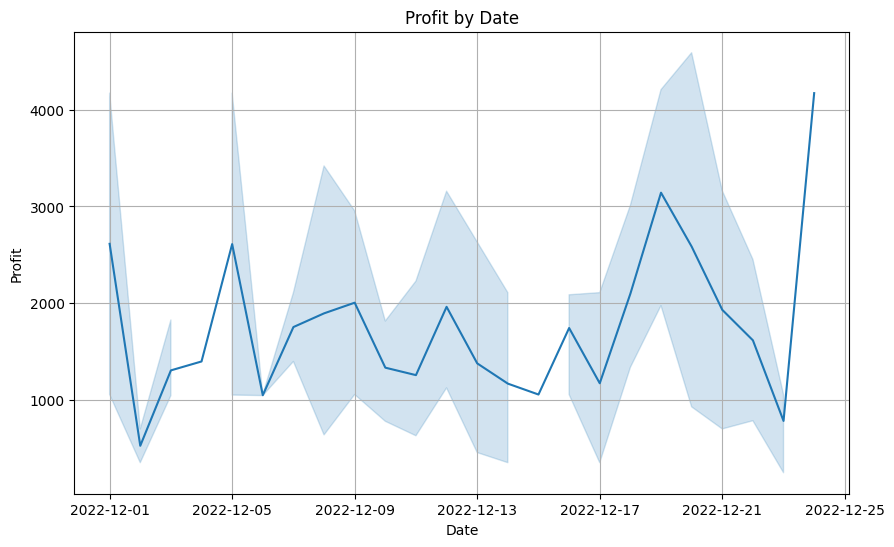

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=bikes_df, x='Date', y='Profit')

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit by Date')
plt.grid(True)

plt.show()

<p>Now, you will see my <mark>favourite plot</mark> in this notebook and within this dataset. I build up a plot to <mark>illustrate the correlation</mark> between age of the customer and the profit from him|her. I was curios about the fact - does the company gets more profit from male or female and who sell more expensive - young girl or old man. As you will see below, the correlation between F and M genders is greater for F gender. The older the lady - the higher price she wants and get. For M gender, the correlation is the same, but not so strong</p>

<Figure size 1000x600 with 0 Axes>

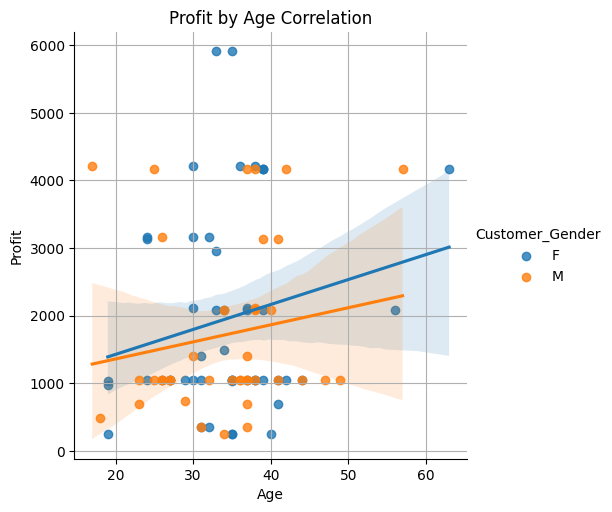

In [10]:
plt.figure(figsize=(10, 6))

sns.lmplot(data = bikes_df, x='Customer_Age', y='Profit', hue='Customer_Gender')
plt.grid(True)

plt.title('Profit by Age Correlation')
plt.xlabel('Age')
plt.ylabel('Profit')
plt.show()

<p>I wanted to explain the chart above and started from the visualization the <mark>total amount of Group Ages</mark>. I counted this groups and build up a simple bar plot with grid (of course) and teal color (my favourite one). According to the graph, the Adults Group Age is the biggest. Its lofically that they have the biggest profit at the chart above. They dont sell more expensive, they just sell more regular</p>

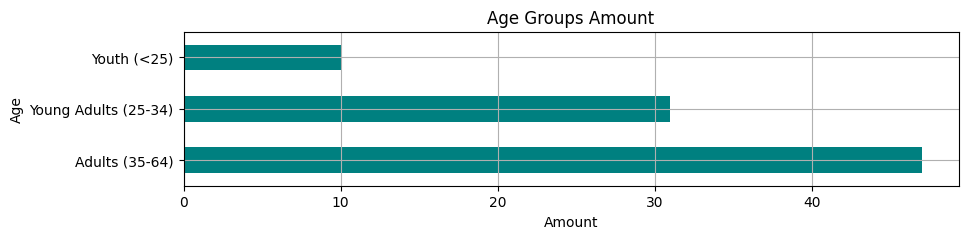

In [12]:
bikes_df['Age'].value_counts().plot(kind = 'barh', figsize = (10,2), grid = True, color='teal')
plt.title('Age Groups Amount')
plt.xlabel('Amount')
plt.ylabel('Age')
plt.show()

<p>Last thing I wanted to visualize is to count the bikes which are sold most often. I am not really big fan of bikes, so if my conclusion are stupid for you, I am sorry, I am not really good at it. So, I build up a plot - <mark>Top 5 sold model</mark> and got the result below. I can give a coclusion (it can be wrong) that these models above either the most popular or the most problematic and everybody wants to gid rif of it</p>

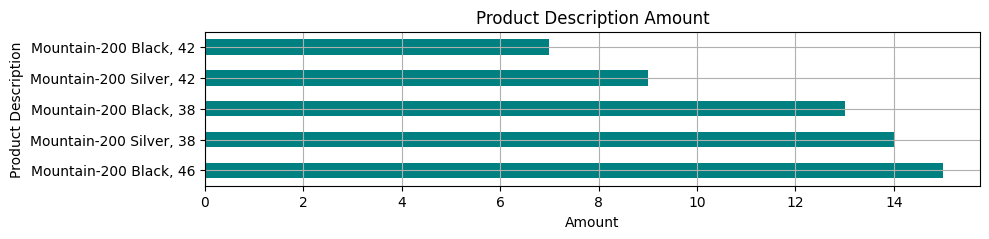

In [13]:
bikes_df['Product_Description'].value_counts(ascending = False).head().plot(kind = 'barh', figsize = (10,2), grid = True, color='teal')
plt.title('Product Description Amount')
plt.xlabel('Amount')
plt.ylabel('Product Description')
plt.show()

<p>Finally, here is the <mark>heatmap correlation</mark> for these columns - 'Order_Quantity','Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue'. I just decided to look at the total amount of prices columns at the same time. Maybe it is not so logically and not so objective, but here, we can make a coclusion that <mark>Unit Cost doesnt affect on the total Profit</mark>. So, you sell more, doesnt mean that you will get more funds for the one unit.</p>

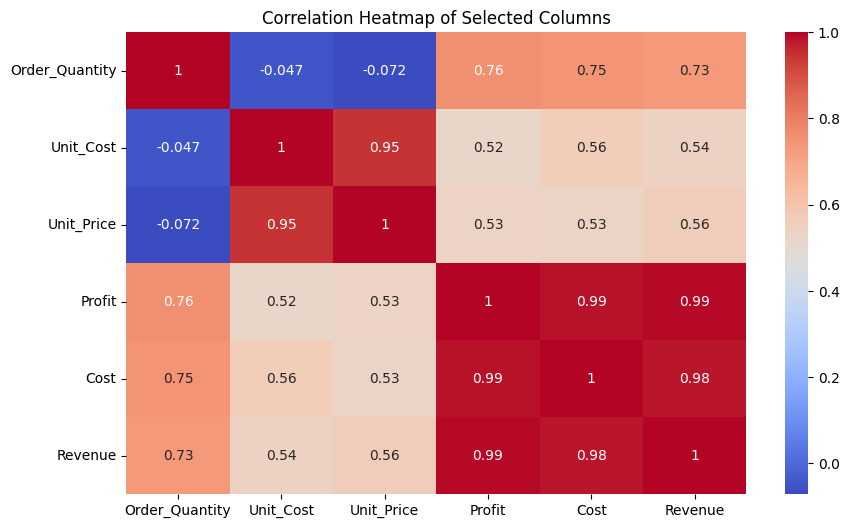

In [14]:
selected_columns = ['Order_Quantity','Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
heatmap_data = bikes_df[selected_columns]

plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1>Conclusion</h1>
</div>
<p></p>
<p>Thank you very much for reading my notebook up to the very end, I really appreciate it. I tried to stay as detailed as it possible and male not so trivial conclusion as the majority does. I hope you got smth new and interesting today, in code or in conclusion, no matter. If yes, upvote my notebook, so many other Kagglers see it. I will really appreciate any of your feedback - <mark>I read all of the comments</mark>, be sure. Good luck!</p>